# #Some Key Details
Suburb: Suburb
Address: Address
Rooms: Number of rooms
Price: Price in Australian dollars
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. 

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
SellerG: Real Estate Agent
Date: Date sold
Distance: Distance from CBD in Kilometres
Regionname: General Region (West, North West, North, North east ...etc) 
Propertycount: Number of properties that exist in the suburb.
Bedroom2 : Scraped # of Bedrooms (from different source)
Bathroom: Number of Bathrooms 
Car: Number of carspots 
Landsize: Land Size in Metres
BuildingArea: Building Size in Metres
YearBuilt: Year the house was built 
CouncilArea: Governing council for the area 
Lattitude: Self explanitory 
Longtitude: Self explanitory

In [62]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt2
import matplotlib as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
from datetime import datetime 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

#For Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#For Random Forest
from sklearn.ensemble import RandomForestClassifier

#For XGBOOST
import xgboost as xgb

# Basic Data Exploration

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.shape

(34857, 21)

In [4]:
g = df.loc[df['Method']=='W']
g.Method.value_counts()

W    173
Name: Method, dtype: int64

In [5]:
df.Rooms.value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

Text(0.5, 1.0, 'Number of Rooms in a house vs Number of such occurences')

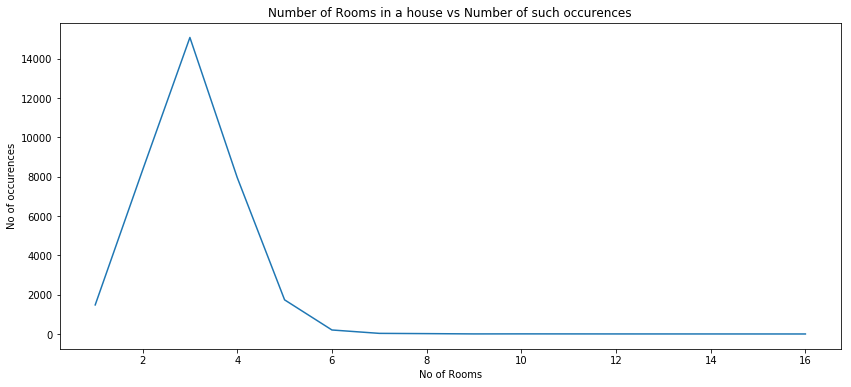

In [6]:
plt2.figure(figsize=(14,6))
sns.lineplot(data=df.Rooms.value_counts())
plt2.xlabel("No of Rooms")
plt2.ylabel("No of occurences")
plt2.title("Number of Rooms in a house vs Number of such occurences")

So we see that there are a lot of 3 Room houses as compared to other houses

In [7]:
df['Car'].value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64

In [8]:
df['Type'].value_counts()

h    23980
u     7297
t     3580
Name: Type, dtype: int64

In [9]:
df['Regionname'].value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [10]:
df['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [11]:
df['Address'].value_counts()

5 Charles St          6
25 William St         4
21 May St             3
1 Bruce St            3
2 George St           3
7 Hope St             3
39 Moore St           3
14 James St           3
5 Margaret St         3
12 Mirams St          3
13 Robinson St        3
1 Daisy St            3
33 McCracken St       3
1088 Toorak Rd        3
12 Grandview Av       3
36 Aberfeldie St      3
53 William St         3
7 Churchill Av        3
38 Lily St            3
23 Cromwell St        3
176 Darebin Rd        3
38 Stewart St         3
3 Charles St          3
14 Rose St            3
57 Bay Rd             3
14 Northcote St       3
3 Donald St           3
16 Clyde St           3
28 Blair St           3
9 Margaret St         3
                     ..
12 Prospect St        1
109b Cambridge St     1
195 Mason St          1
4 Mead Ct             1
11/231 High St        1
5/19 Boundary St      1
8 Powlett St          1
10 Glenroy Rd         1
10 Dromana Av         1
2B Tarana Av          1
1B Paproth Gr   

In [12]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [13]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
df.dropna(how="any").shape

(8887, 21)

In [15]:
df["Price"].value_counts(dropna=False)
# we see there are a lot of null values

NaN          7610
600000.0      235
1100000.0     235
650000.0      219
800000.0      217
1300000.0     210
1000000.0     205
1200000.0     204
700000.0      197
750000.0      194
900000.0      191
850000.0      176
950000.0      172
1250000.0     158
1500000.0     153
500000.0      153
1400000.0     150
1150000.0     149
550000.0      141
1050000.0     139
780000.0      136
770000.0      131
720000.0      128
1350000.0     125
630000.0      124
730000.0      124
580000.0      123
620000.0      123
680000.0      122
640000.0      120
             ... 
3851000.0       1
2862000.0       1
359000.0        1
3590000.0       1
2718000.0       1
307000.0        1
1654000.0       1
343000.0        1
1489000.0       1
2268000.0       1
678250.0        1
678913.0        1
2451000.0       1
1133000.0       1
940500.0        1
2714000.0       1
1657000.0       1
2077000.0       1
1270500.0       1
940750.0        1
1750500.0       1
372100.0        1
262500.0        1
1833000.0       1
1357500.0 

In [16]:
new_df = df.fillna(method="bfill")
#for replacing the null values

In [17]:
new_df.head()
# Null values replaced

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1480000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,79.0,1900.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,79.0,1900.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1465000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,150.0,1900.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [18]:
new_df.shape

(34857, 21)

In [19]:
new_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,3.485700e+04,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.00000,34857.000000,34857.000000,34857.000000
mean,3.031012,1.073152e+06,11.184984,3116.061250,3.096996,1.634966,1.729638,603.560031,163.661048,1964.21921,-37.812134,145.001526,7572.763692
std,0.969933,6.671098e+05,6.788803,109.022752,0.986730,0.724765,1.008998,3130.552650,361.151261,37.53587,0.090142,0.118802,4427.958844
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.00000,-38.190430,144.423790,83.000000
25%,2.000000,6.400000e+05,6.400000,3051.000000,3.000000,1.000000,1.000000,254.000000,104.000000,1940.00000,-37.867110,144.934480,4385.000000
50%,3.000000,8.830000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,541.000000,139.000000,1970.00000,-37.809500,145.006490,6763.000000
75%,4.000000,1.315000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,675.000000,197.000000,1999.00000,-37.754700,145.070800,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.00000,-37.390200,145.526350,21650.000000


In [20]:
int(1.073152e+06)

1073152

In [21]:
# Creating a new sub dataframe for generating a heatmap
adf = new_df[:30]
adf.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1480000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,79.0,1900.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,79.0,1900.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1465000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,150.0,1900.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [22]:
# plt2.figure(figsize=(50,30))
# sns.heatmap(data = adf[["Distance",'Car','Rooms']], annot = True)

In [23]:
new_df.isnull().sum()
# All missing values were replaced by neighbouring values

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [24]:
new_df.Rooms.value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

In [25]:
# Finding the median Value of 1,2,3 room houses

list_price_1room = []
list_price_2rooms = []
list_price_3rooms = []

for i in range(len(new_df.Rooms)):
    if new_df.Rooms[i] == 3:
        g = new_df.Price[i]
        list_price_3rooms.append(g)
    if new_df.Rooms[i] == 2:
        g2 = new_df.Price[i]
        list_price_2rooms.append(g2)
    if new_df.Rooms[i] == 1:
        g3 = new_df.Price[i]
        list_price_1room.append(g3)

print("The number of 1 room houses are", len(list_price_1room))
mean_1room = sum(list_price_1room) / len(list_price_1room)
print('The mean price of 1 room houses is',mean_1room)        
        
print("The number of 2 room houses are", len(list_price_2rooms))
mean_2rooms = sum(list_price_2rooms) / len(list_price_2rooms)
print('The mean price of 2 room houses is',mean_2rooms)

print("The number of 3 room houses are", len(list_price_3rooms))
mean_3rooms = sum(list_price_3rooms) / len(list_price_3rooms)
print('The mean price of 3 room houses is',mean_3rooms)
df_3room = pd.DataFrame(list_price_3rooms)
df_3room.describe()

The number of 1 room houses are 1479
The mean price of 1 room houses is 558582.6105476674
The number of 2 room houses are 8332
The mean price of 2 room houses is 823269.3080892942
The number of 3 room houses are 15084
The mean price of 3 room houses is 1047590.6843012463


,0
count,1.508400e+04
mean,1.047591e+06
std,5.449186e+05
min,2.200000e+05
25%,6.820000e+05
50%,9.000000e+05
75%,1.285000e+06
max,9.000000e+06


In [26]:
df['ndf'] = pd.to_datetime(new_df.Date)

In [27]:
df3 = df['ndf'].sort_values()

In [28]:
df3.head()

10128   2016-01-28
10127   2016-01-28
2866    2016-01-28
10637   2016-03-09
7020    2016-03-09
Name: ndf, dtype: datetime64[ns]

In [29]:
# df.groupby(['Price','Rooms']).mean()

In [30]:
df_for_training = new_df.pop('Price')
# did once. dont run again else error

In [31]:
new_df

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,79.0,1900.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,79.0,1900.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,150.0,1900.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,142.0,2014.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,210.0,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,210.0,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0


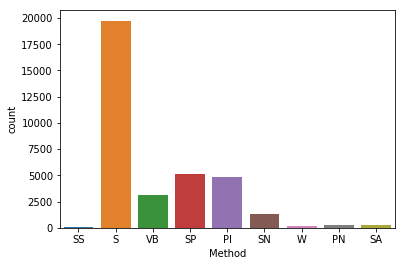

In [32]:
sns.countplot(new_df['Method'])

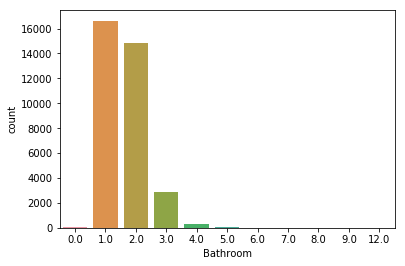

In [33]:
sns.countplot(new_df['Bathroom'])

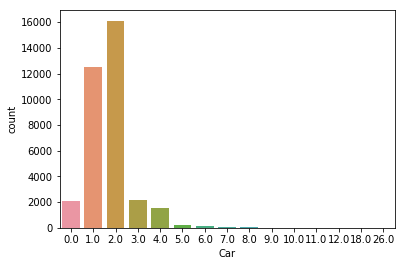

In [34]:
sns.countplot(new_df['Car'])

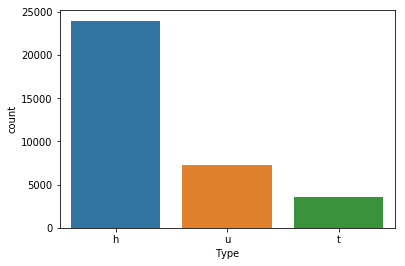

In [35]:
sns.countplot(new_df['Type'])

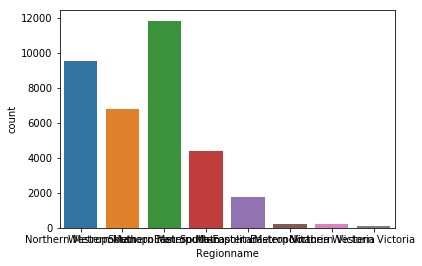

In [36]:
sns.countplot(new_df['Regionname'], orient = 'v')

In [38]:
list1 = new_df["Date"].tolist()
# print(list1)
list_dates = []
for i in list1:
    from datetime import datetime
    list_dates.append(datetime.strptime(i,"%d/%m/%Y"))
# list_dates.sort()
# print(list_dates)
y = range(len(list_dates))
bins = len(list_dates)

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64


C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


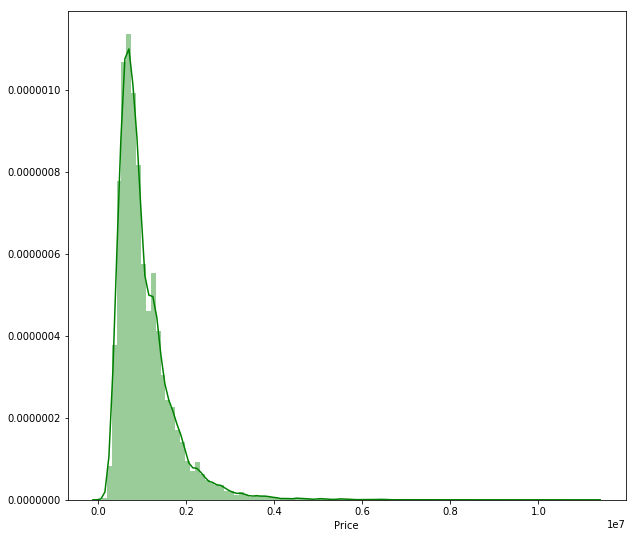

In [40]:
# Histogram
print(df['Price'].describe())
plt2.figure(figsize=(10,9))
sns.distplot(df['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

       Date  Houses Bought
0   2016-01              3
1   2016-02             44
2   2016-04            502
3   2016-05           1531
4   2016-06           1242
5   2016-07            689
6   2016-08           1173
7   2016-09           1469
8   2016-10            852
9   2016-11           1787
10  2016-12           1000
11  2017-02            687
12  2017-03           1110
13  2017-04           1018
14  2017-05           1885
15  2017-06           1933
16  2017-07           2270
17  2017-08           1715
18  2017-09           2659
19  2017-10           3048
20  2017-11           2600
21  2017-12            927
22  2018-01            818
23  2018-02           1911
24  2018-03           1984


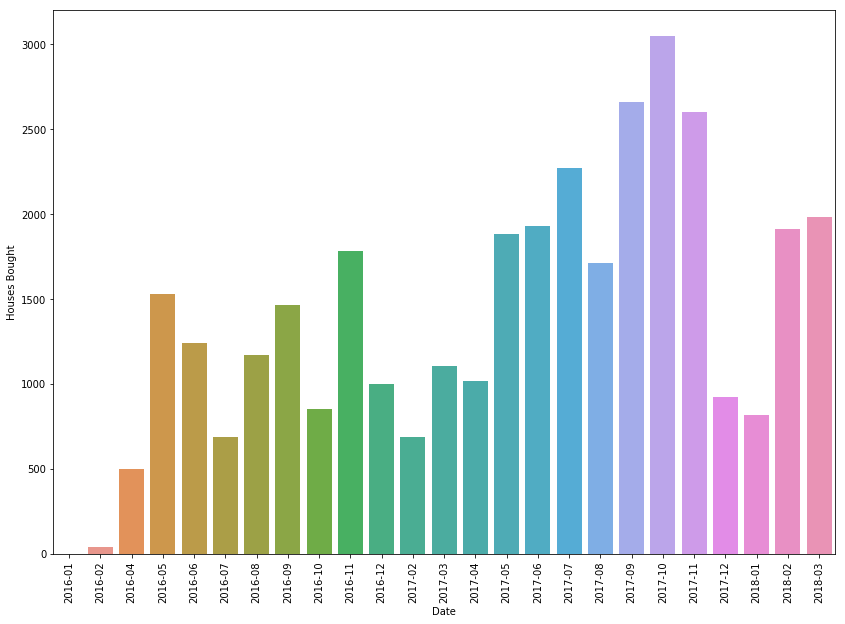

In [42]:
#seb
idx = pd.to_datetime(list_dates)
new = pd.Series(idx.to_period('m'))
df2 = new.value_counts().sort_index().reset_index()
df2.columns = ['Date','Houses Bought']
plt2.figure(figsize=(14,10))
#me
plt2.xticks(rotation=90)
sns.barplot(x='Date',y='Houses Bought', data = df2)
print(df2)

## So we can see that the cooldown happens around Dec 2017-Jan 2018